In [2]:
import pandas as pd

# COVID-19

### CSSE data

In [3]:
# Read
csse_ts = pd.read_csv('data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
# Nvm these
csse_ts = csse_ts.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [5]:
# Pivot and sort
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [5]:
csse_ts.index.name = 'Date_Confirmed' # name rows
csse_ts.reset_index(inplace=True) # set index

In [6]:
# Set date and sort
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [7]:
# Resample for daily mean (if needed)
csse_ts = csse_ts.resample('1D').mean().round()

In [8]:
# Calculate delta (increase) of daily cases
csse_daily = csse_ts.diff().fillna(0).reset_index()

### Export

In [9]:
csse_ts.to_csv('ts_world_covid19.csv', index=True)
csse_daily.to_csv('delta_world_covid19.csv', index=True)

### Plots

In [60]:
from numpy import *
import math
import matplotlib.pyplot as plt

In [61]:
# Show all countries
# csse_ts.columns.values 

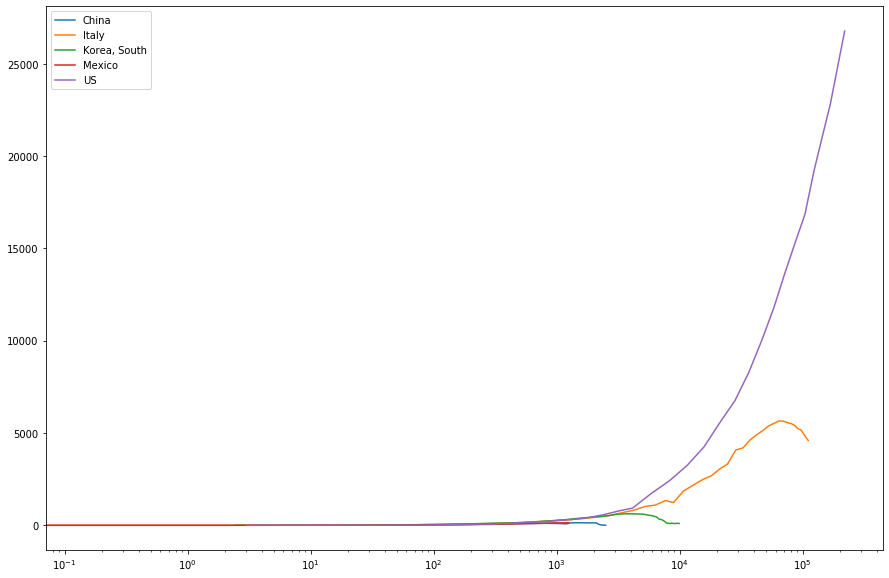

In [63]:
plt.figure(figsize=(15,10))

for state in ['China', 'Italy', 'Korea, South', 'Mexico', 'US']:
    plt.plot(list(csse_ts[state].dropna().rolling(window=7).mean()), list(csse_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.yscale('linear')
plt.xscale('log')

plt.show()